<a href="https://colab.research.google.com/github/raj978/ECS-189G-DeepLearning/blob/main/stage4_generationn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!unzip -o /content/drive/MyDrive/stage_4_data.zip -d /content/data/


Streaming output truncated to the last 5000 lines.
  inflating: /content/data/stage_4_data/text_classification/train/pos/9260_7.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._9260_7.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/1599_7.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._1599_7.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/2174_8.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._2174_8.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/2309_9.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._2309_9.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/12034_10.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._12034_10.txt  
  inflating: /content/data/stage_4_data/text_classification/

In [6]:
import os
import numpy as np
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN, LSTM
from keras.optimizers import Adam
import matplotlib.pyplot as plt


Number of sequences: 46728


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 3.1739
Epoch 2/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4449
Epoch 3/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.2620
Epoch 4/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.1871
Epoch 5/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.1319
Epoch 6/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.0901
Epoch 7/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.0417
Epoch 8/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.0039
Epoch 9/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9858
Epoch 10/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9524
Epoch 11/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.9167
Epoch 12/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8973
Epoch 13/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8878
Epoch 14/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8612
Epoch 15/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

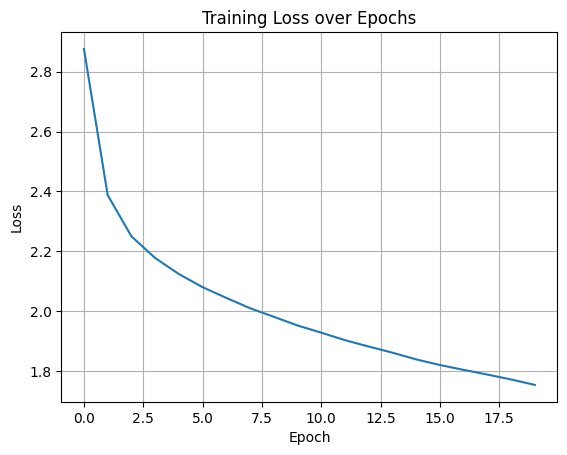

Sample generated text:

why did the chickensss.. s .                                                                                                                                                                                                                                                                                                   


In [5]:
#simple rnn
# Load the text data
with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    lines = f.readlines()

# Clean and prepare the data
lines = [line.strip().lower() for line in lines if len(line.strip()) > 0]
text = ' '.join(lines)

# Character set and mapping
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for c, i in char_to_idx.items()}

SEQ_LENGTH = 40
STEP = 3
sequences = []
next_chars = []

# Create input sequences and next character labels
for i in range(0, len(text) - SEQ_LENGTH, STEP):
    sequences.append(text[i: i + SEQ_LENGTH])
    next_chars.append(text[i + SEQ_LENGTH])

print(f"Number of sequences: {len(sequences)}")

# One-hot encoding
X = np.zeros((len(sequences), SEQ_LENGTH, len(chars)), dtype=np.bool_)
y = np.zeros((len(sequences), len(chars)), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(128, input_shape=(SEQ_LENGTH, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam())
history = model.fit(X, y, batch_size=128, epochs=20)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Text generation function
def generate_text(seed, length=300):
    generated = seed.lower()
    sentence = seed.lower()[-SEQ_LENGTH:]

    for _ in range(length):
        x_pred = np.zeros((1, SEQ_LENGTH, len(chars)))
        for t, char in enumerate(sentence):
            if char in char_to_idx:
                x_pred[0, t, char_to_idx[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(preds)
        next_char = idx_to_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

    return generated

# Generate and print sample output
print("Sample generated text:\n")
print(generate_text("why did the chicken", length=300))


Number of training sequences: 46728
Epoch 1/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.2870
Epoch 2/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.6316
Epoch 3/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.3804
Epoch 4/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.2732
Epoch 5/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.1895
Epoch 6/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.1340
Epoch 7/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.0736
Epoch 8/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.0332
Epoch 9/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.9945
Epoch 10/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.9551
Epoch 11/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.9512
Epoch 12/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8982
Epoch 13/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.8655
Epoch 14/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.8421
Epoch 15/20
366/366 ━

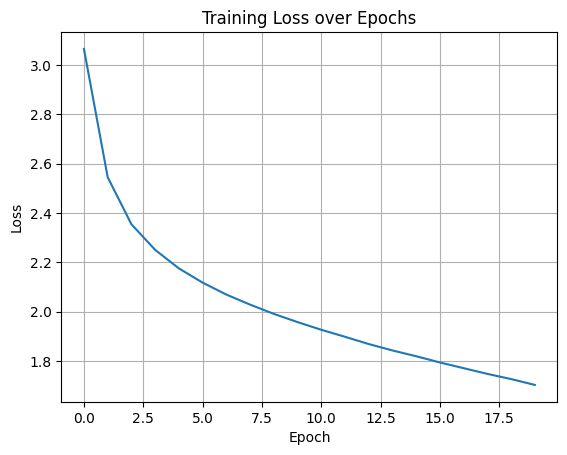

Sample generated text:

why did the chicken"wvl-rmwob1q_w__krlk_rreuiagcsfv-.vmvw=te3n__g_kkow_0_k-k__-_k.:o__myceorko--"b=re_f_.w1a_swc-kkyy___qetf_6ceeko_o-=_eckky__m__a_kkee_wo_-u__e__ek't_r__k__kt___kqetcrt;`,%d;p.x"hm--ok-c-wwndd_a_dvm#w-_hh___gm___t_ekf_/-_r_qek__6_wrctwx sgo/sj..0wgfaa_gg_m&__i__t____bow;wa_-k_____d5rwtgtmv_k_wcr!&_&_


In [8]:
# Load the text data
with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    lines = f.readlines()

# Clean and prepare the text
lines = [line.strip().lower() for line in lines if len(line.strip()) > 0]
text = ' '.join(lines)

# Create character-level vocabulary
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for c, i in char_to_idx.items()}

# Sequence settings
SEQ_LENGTH = 40
STEP = 3
sequences = []
next_chars = []

# Create input-output pairs for training
for i in range(0, len(text) - SEQ_LENGTH, STEP):
    sequences.append(text[i: i + SEQ_LENGTH])
    next_chars.append(text[i + SEQ_LENGTH])

print(f"Number of training sequences: {len(sequences)}")

# One-hot encode the input and output
X = np.zeros((len(sequences), SEQ_LENGTH, len(chars)), dtype=bool)
y = np.zeros((len(sequences), len(chars)), dtype=bool)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(SEQ_LENGTH, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer=Adam())
history = model.fit(X, y, batch_size=128, epochs=20)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Temperature-based sampling function
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature  # Add epsilon to avoid log(0)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Text generation function using the trained LSTM model
def generate_text(seed, length=300, temperature=0.7):
    generated = seed.lower()
    sentence = seed.lower()[-SEQ_LENGTH:]
    for _ in range(length):
        x_pred = np.zeros((1, SEQ_LENGTH, len(chars)))
        for t, char in enumerate(sentence):
            if char in char_to_idx:
                x_pred[0, t, char_to_idx[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = idx_to_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

    return generated

# Generate and print sample output
print("Sample generated text:\n")
print(generate_text("why did the chicken", length=300, temperature=0.7))


In [14]:
# Step 1: Load and tokenize text into words
with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    text = f.read().lower()

import re
text = re.sub(r'[^a-zA-Z\s]', '', text)
words = ["<START>"] + text.split() + ["<END>"]  # Add start and end tokens

# Step 2: Create vocab mappings
unique_words = sorted(list(set(words)))
word_to_idx = {w: i for i, w in enumerate(unique_words)}
idx_to_word = {i: w for w, i in word_to_idx.items()}

# Step 3: Create input sequences and targets
SEQ_LENGTH = 5
sequences = []
next_words = []

for i in range(len(words) - SEQ_LENGTH):
    sequences.append([word_to_idx[word] for word in words[i:i + SEQ_LENGTH]])
    next_words.append(word_to_idx[words[i + SEQ_LENGTH]])

import numpy as np
X = np.array(sequences)
y = np.array(next_words)

# Step 4: One-hot encode labels
from keras.utils import to_categorical
y = to_categorical(y, num_classes=len(unique_words))

# Step 5: Build and train LSTM model using Embedding
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=len(unique_words), output_dim=128, input_length=SEQ_LENGTH))
model.add(LSTM(256))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam())
history = model.fit(X, y, batch_size=128, epochs=75)

# Step 6: Word-level sampling with temperature and top-k filtering
def sample(preds, temperature=1.0, top_k=10):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    top_indices = preds.argsort()[-top_k:][::-1]
    top_preds = preds[top_indices]
    top_preds = top_preds / np.sum(top_preds)

    return top_indices[np.random.choice(len(top_preds), p=top_preds)]

# Step 7: Generate text (with <START> token and repetition filter over last 5)
def generate_text(seed_text="<START>", length=50, temperature=0.6, top_k=5):
    generated = seed_text.lower().split()
    sentence = generated[-SEQ_LENGTH:]

    for _ in range(length):
        x_pred = np.zeros((1, SEQ_LENGTH), dtype=int)
        for t, word in enumerate(sentence):
            x_pred[0, t] = word_to_idx.get(word, 0)

        for _ in range(5):  # retry to avoid repetition
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, temperature, top_k=top_k)
            next_word = idx_to_word[next_index]
            # Repetition filter across last 5 words
            if len(generated) < 5 or next_word not in generated[-5:]:
                break

        if next_word == "<END>":
            break

        generated.append(next_word)
        sentence = sentence[1:] + [next_word]

    return ' '.join([w for w in generated if w not in ["<START>", "<END>"]])

# Clean and format output
def clean_output(text):
    text = text.strip()
    text = text[0].upper() + text[1:]
    if not text.endswith('.'):
        text += '.'
    return text

# Sample generation
print(clean_output(generate_text("why did the chicken", length=30, temperature=0.6)))


Epoch 1/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 7.4551
Epoch 2/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.3943
Epoch 3/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.1386
Epoch 4/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.8334
Epoch 5/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.4440
Epoch 6/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.1358
Epoch 7/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.7822
Epoch 8/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.4502
Epoch 9/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0905
Epoch 10/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.7877
Epoch 11/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.4305
Epoch 12/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1794
Epoch 13/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8925
Epoch 14/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6403
Epoch 15/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo